In [1]:
import numpy as np
import pandas as pd
#from gradient_Descent import *
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
import time

def normalize_dataframe(df):
    for column in df:
        df[column] = (df[column] - min(df[column])) / ( max(df[column]) - min(df[column]) )
    return df

def normalize_dataframe_column(df):
        return (df - min(df)) / ( max(df) - min(df) )

def stochastic_gradient_descent(X,Y,theta,alpha,iterations):
    qut_samples = Y.shape[0]
    cost_history = [0]*iterations*qut_samples
    
    for iteration in range (iterations):
        for sample in range (qut_samples):#hipotese
            h = X.iloc[sample,:].dot(theta)
            #diferenca entre hipotese e predicao
            loss = h - Y[sample]
            gradient = X.iloc[sample,:].T * loss
            #Gradiente descendente
            #gradient = np.array(loss * X.iloc[:,sample].T).reshape(1, theta.shape[1])
            #changing values of parameters 
            theta = theta - np.array([(alpha * gradient)]).T
            #New cost value
            cost = cost_function(X,Y,theta)
            #print ("Iteration: %d | Cost: %f" % (iteration+1, cost))
            cost_history[iteration*qut_samples+sample] = cost
    return theta, cost_history


'''Criando a funcao de custo
    input:
        X: matriz de features
        Y: matriz de gabarito
        theta: array de pesos
    output:
        custo: custo da iteração
'''
def cost_function(X,Y,theta):
    qut_samples = Y.shape[0]
    h = X.dot(theta)
    cost = np.sum((h - Y)**2)/(2*qut_samples)
    return cost

'''Criando funcao para executar o gradiente descendente (batch)
    input:
        X: matriz de features
        Y: matriz de gabarito
        theta: array de pesos
        alpha:learning rate
        iterations: numero max de iteracoes para parada
    output:
       theta: vetor de thetas atualizados
       cost_history: vetor do historico de custos ao longo do processo
'''
def gradient_descent(X,Y,theta,alpha,iterations):
    cost_history = [0]*iterations
    qut_samples = Y.shape[0]
    
    for iteration in range (iterations):
        #hipotese
        h = X.dot(theta)
        #diferenca entre hipotese e target
        loss = np.array(h - Y).T
        #Gradiente descendente
        XLoss = X.T.dot(loss.T)
        
        gradient = XLoss/qut_samples
        #changing values of parameters
        theta = theta - (alpha * gradient)
        #New cost value
        cost = cost_function(X,Y,theta)
        cost_history[iteration] = cost
        #print ("Iteration: %d | Cost: %f" % (iteration+1, cost))
    return theta, cost_history



'''
Funcao para calcular regressao linear utilizando sklearn 
    Input:
        X: matriz de features
        Y: matriz de gabarito
        alpha: learning rate
        iterations: numero de iteracoes 
    Output:
        rmse: valor de erro gerado na predicao


'''
def baseLine_GD(X,Y,alpha,iterations):
    #Y = Y.T
    #X = X.T
    reg = linear_model.LinearRegression()
    reg.fit(X,Y)
    Y_pred = reg.predict(X)
    rmse = np.sqrt(metrics.mean_squared_error(Y, Y_pred))
    return rmse

'''Criando funcao para descobrir o erro root-mean-square 
    input:
        Y: vetor gabarito
        Y_pred: vetor de predicao gerado pelo modelo
    output:
        rmse: erro gerado
'''
def rmse(Y,Y_pred):
    rmse = np.sqrt(((Y - Y_pred) ** 2).mean())
    return float(rmse)

'''Criando funcao para cencontrar valores otimos de theta, usando equacoes normais. 
    input:
        Y: vetor gabarito
        X: matriz de features
        theta: vetor inicial de pesos
    output:
        theta: novos valores para os vetor de pesos
'''
def normal_equation(X,Y,theta):
    
#    X_transpose = X
#    X_ = X.T
#    Y_ = Y.T
    theta_ = theta.T
   
    primeiro = X.T.dot(X)
    segundo = np.linalg.pinv(primeiro)
    terceiro = segundo.dot(X.T)
    quarto = terceiro.dot(Y)
    theta = quarto
    return theta

In [2]:
#data = pd.read_csv('../data/student.csv')

#math = data['Math'].values
#reading= data['Reading'].values
#writing = data['Writing'].values

#qut_samples = len(math) # quantidade de amostras na base de treino 
#x0 = np.ones(qut_samples) # x0 acompanha theta0, sempre igual a 1
#X = np.array([x0,math, reading])
#theta = np.zeros((1,3))
#Y = np.array(writing)
#Y = Y.reshape(1,qut_samples)
#alpha = 0.0001
#iterations = 1000
#print(X.shape)

#newTheta,cost_history = gradient_descent(X,Y,theta, alpha, iterations)

#newTheta_norm = normalize_equation(X,Y,theta)
#Y_pred_norm = newTheta_norm.T.dot(X)
#Y_pred = newTheta.dot(X)
#rmse_norm = rmse(Y,Y_pred_norm)
#rmse_ = rmse(Y,Y_pred)
#print("RSME error: ",rmse_)
#print("RSME error norm: ", rmse_norm)

#Ploting the data
#plt.plot(np.arange(1000), cost_history, label = "Cost History")

# naming the x axis
#plt.xlabel('x - axis: Number of iterations')
# naming the y axis
#plt.ylabel('y - axis: Cost')
#plt.legend()
 
# giving a title to my graph
#plt.title('Custom vs OpenCV Convolution')
#plt.show
#print(Y_pred)
#print(df[0])

In [3]:
#cut is a dictionary that uses the semantics of cut feature to create a discrete numerical value based on an e^x function
#cut = {'Fair':3, 'Good':7, 'Very Good':20, 'Premium':54, 'Ideal':148}
cut = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [11]:
#Normalize and Discretize the DF
df = pd.read_csv('../data/diamonds.csv')
df = df.sample(frac=1)
df["cut"] = df["cut"].map(cut)
df["color"] = df["color"].map(color)
df["clarity"] = df["clarity"].map(clarity)
df['bias'] = 1
df['depth'] = normalize_dataframe_column(df['depth'])
df['clarity'] = normalize_dataframe_column(df['clarity'])
df['color'] = normalize_dataframe_column(df['color'])
df['cut'] = normalize_dataframe_column(df['cut'])
df['table'] = normalize_dataframe_column(df['table'])
#Volume is the combination of all three dimensions of the diamond
df['volume'] = df['x'] * df['y'] * df['z']
df['volume'] = normalize_dataframe_column(df['volume'])

#Separate the DF into Train and Test
msk = np.random.rand(len(df)) < 0.9

test_df = df[~msk]

df = df[msk]

#Separate the Training DF into Train and Validation
msk = np.random.rand(len(df)) < 0.8

train_df = df[msk]
validation_df = df[~msk]

Y_train = np.array([train_df['price']]).T
Y_validation = np.array([validation_df['price']]).T
Y_test = np.array([test_df['price']]).T

#Add the Bias and Remove the Target
train_df = train_df[['bias','carat', 'cut', 'color','clarity','depth','table','volume']]
validation_df = validation_df[['bias','carat', 'cut', 'color','clarity','depth','table','volume']]
test_df = test_df[['bias','carat', 'cut', 'color','clarity','depth','table','volume']]

theta = np.ones((8,1))

#print(batch_gd_rmse)


RMSE error Batch GD:  1234.1786419794562
RMSE error Norm:  1233.1476103478724
RMSE error Scikit Norm:  1229.8096551942272


<function matplotlib.pyplot.show(*args, **kw)>

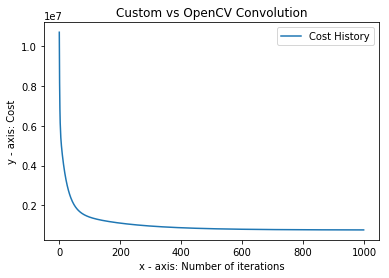

In [12]:
alpha = 0.1
iterations = 1000

#Batch Gradient Descent
start_time_custom = time.time()
newTheta,cost_history = gradient_descent(train_df,Y_train,theta, alpha, iterations)
Y_pred = validation_df.dot(newTheta)
batch_gd_rmse = rmse(Y_validation,Y_pred)
batch_gd_time = time.time() - start_time_custom


#Normal Distribution
start_time_custom = time.time()
newTheta_norm = normal_equation(train_df,Y_train,theta)
Y_pred_norm = validation_df.dot(newTheta_norm)
rmse_norm = rmse(Y_validation,Y_pred_norm)
custom_normal_time = time.time() - start_time_custom

#Normal Distribution with Scikit
start_time_custom = time.time()
norm_rmse_scikit = baseLine_GD(train_df,Y_train,alpha,iterations)
scikit_normal_time = time.time() - start_time_custom


print("RMSE error Batch GD: ",batch_gd_rmse)
print("RMSE error Norm: ", rmse_norm)
print("RMSE error Scikit Norm: ", norm_rmse_scikit)


#Ploting the data
plt.plot(np.arange(iterations), cost_history, label = "Cost History")

# naming the x axis
plt.xlabel('x - axis: Number of iterations')
# naming the y axis
plt.ylabel('y - axis: Cost')
plt.legend()
 
# giving a title to my graph
plt.title('Custom vs OpenCV Convolution')
plt.show

RMSE error:  1945.7449978839713


<function matplotlib.pyplot.show(*args, **kw)>

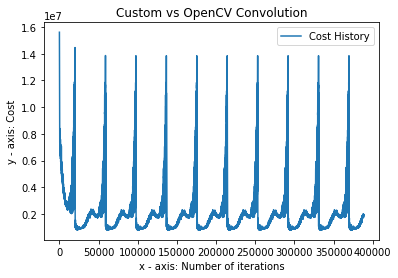

In [10]:
alpha = 0.01
iterations = 10

#Stochastic Gradient Descent
start_time_custom = time.time()
newTheta,cost_history = stochastic_gradient_descent(train_df,Y_train,theta, alpha, iterations)
Y_pred = validation_df.dot(newTheta)
custom_stochastic_gd_rmse = rmse(Y_validation,Y_pred)
custom_stochastic_gd_time = time.time() - start_time_custom

print("RMSE error: ",custom_stochastic_gd_rmse)

#Ploting the data
plt.plot(np.arange(iterations*train_df.shape[0]), cost_history, label = "Cost History")

# naming the x axis
plt.xlabel('x - axis: Number of iterations')
# naming the y axis
plt.ylabel('y - axis: Cost')
plt.legend()
 
# giving a title to my graph
plt.title('Custom vs OpenCV Convolution')
plt.show

In [ ]:
start_time_custom = time.time()
clf = SGDClassifier(loss="squared_loss", penalty="none", max_iter=20)
clf.fit(train_df.T, Y_train.T)
Y_pred = clf.predict(validation_df.T)
scikit_stochastic_gd_rmse = rmse(Y_validation.T,Y_pred)
scikit_stochastic_gd_time = time.time() - start_time_custom

In [28]:
print("Batch Gradient Descent Time (10000 iterations): ", batch_gd_time)
print("Custom Stochastic Gradient Descent Time (10 iteration): ", custom_stochastic_gd_time)
print("Scikit Stochastic Gradient Descent Time (10 iteration): ", scikit_stochastic_gd_time)
#print("Scikit Stochastic Gradient Descent Time (1 iteration): ", gd_time)
print("Scikit Normal Equation Time: ", scikit_normal_time)
print("Custom Normal Equation Time: ", custom_normal_time)

Batch Gradient Descent Time (10000 iterations):  27.80274534225464


NameError: name 'custom_stochastic_gd_time' is not defined

In [ ]:
#Y_pred = clf.predict(train_df.T)
#scikit_stochastic_gd_rmse = rmse(Y_train,Y_pred)
print("RMSE error: ", scikit_stochastic_gd_rmse)

RMSE error:  1982.4432388669147


<function matplotlib.pyplot.show(*args, **kw)>

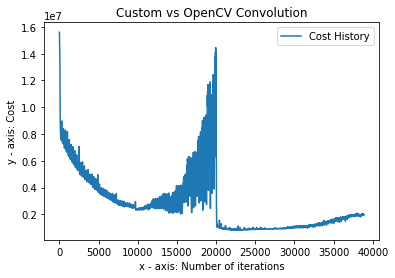